 # Cleanup-Day 🌱

<div class="alert alert-info">
    <h3>Please read the following important information before starting with the programming exercise: </h3>
    <p>In order to avoid problems with the relative file path we recommend to clone the exercise repository into the <b>homework</b> folder and you will <b>get all provided files</b> in the <b>homework/foai22logic-"your_TUM_ID"</b> folder.</p> 
    <p><b>Only modify</b> the logic_exercise.ipynb and <b>Do not</b> change the function name we provided you!</p>
    <p>If we are not able to run your submitted files in an environment with the packages provided by the requirements.txt of the <b><a href="https://github.com/aimaTUM/aima-python">AIMA repository</a></b>, you will fail the programming exercise.</p> 
</div>

# Initialization

In [1]:
# Leave the lines in this block intact
# Do not change this block
import sys, os

# This statement will import all required files from AIMA
sys.path.insert(0, '../../')

import numpy as np
import maps
from field_var import field_var, Path, Litter, Clean, River, Visit
from ask_solution import infer_movement, clean_litter
from utils import expr
from kb import DpllPropKB

try:
    from vis_utils_park import draw_map, draw_tuples
except ModuleNotFoundError:
    from assignment.vis_utils_park import draw_map, draw_tuples
else:
    from vis_utils_park import draw_map, draw_tuples

KB = globals()["DpllPropKB"]

# Introduction

Keeping the local parks in urban regions - such as the Olympiapark in Munich - free from litter is an important task to provide the communities with enjoyable recreational areas. Although there are existing initiatives, like the [Global Cleanup Day](https://worldcleanupday.de/) or more local campaigns such as [Cleanup Munich](https://cleanup-munich.de/mitmachen/), in our fictive scenario the municipality has decided it needs further help with this problem. An autonomous robot - 'EcoBot' - capable of navigating through the park and cleaning litter on the way should be designed.

### Problem Description

The goal of this exercise is to program 'EcoBot', such that it can autonomously navigate through the provided park layouts and clean litter on its way. This is achieved by filling a knowledge base with logical sentences.

### Passing the exercise
You will have passed the exercise if you can successfully solve all **5 scenarios** that are given to you together with this template. Additionally, your code also has to solve **3 hidden scenarios**, that are only available on Artemis. 

_Note: you cannot solve this exercise by hardcoding the solutions for the scenarios given in this template. In order to also solve the scenarios hidden on Artemis, you need to implement the knowledge base with logical sentences in a correct way._

If your implemented function computes the knowledge base such that every scenario is solved correctly (including the hidden ones), you successfully completed this programming exercise. Your code has to compute a valid solution for **each** of the scenarios **within 5 min** on our machine. If your code takes longer to compute a solution, you will fail this submission. Don't worry about the computation time too much as usually the algorithm produces a solution **within one minute** for our specific exercise. Your submission will be evaluated after the deadline, but until then you can update your solution as many times as you like. The last submitted solution will be graded.


# Maps and Visualization

For this exercise, several park layouts (maps) are given. The maps are made out of discrete tiles - very much like a chessboard or the wumpus world. Each map is represented as a 2-dimensional NumPy array ``map[i][j]``. The $(i,j)$-th entry of this array corresponds to the $(i,j)$-th field on the map, where $(0,0)$ is in the upper left corner, $i$ indicates the row number, while $j$ indicates the column number. The x-axis points downwards and the y-axis to the right. Each map is of the same size, that is to say ***6 x 8***. You can find the maps provided with this template in ``maps.py``. See also the visualization below for reference.

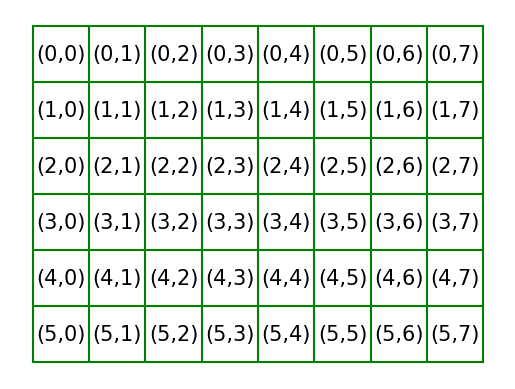

In [2]:
# Field designations for the maps
draw_tuples()

**In the following, more details about the maps and their visualization are given.**

To describe the landscape of the park, each tile can have one or more of the following properties. You are **not** allowed to introduce any other properties.

- **0** denotes grass landscape, which will be represented as:  <img style="vertical-align: -20px; display: inline;" width=80px src="img_notebook/grass.jpg">
- **'P'** denotes the path, which will be represented as: <img style="vertical-align: -20px; display: inline;" width=80px src="img_notebook/path_nn.jpg">
- **'L'** denotes litter, which will be randomly represented as: <img style="vertical-align: -20px; display: inline;" width=80px src="img_notebook/rubbish_1.jpg"> 
<img style="vertical-align: -20px; display: inline;" width=80px src="img_notebook/rubbish_2.png">
<img style="vertical-align: -20px; display: inline;" width=80px src="img_notebook/rubbish_3.png">
<img style="vertical-align: -20px; display: inline;" width=80px src="img_notebook/rubbish_4.png">
- **'R'** denotes a port of a river, which will be represented as: <img style="vertical-align: -20px; display: inline;" width=80px src="img_notebook/river_s.png">
- **'C'** means that the 'tile has been cleaned', which will be represented as:  <img style="vertical-align: -20px; display: inline;" width=80px src="img_notebook/cleaned.png">
- **'V'** means that 'EcoBot' is visiting or has visited that field, i.e. the main body of 'EcoBot' is or has been on that field:  <img style="vertical-align: -20px; display: inline;" width=80px src="img_notebook/visited.png">

In order to visualize the arrays corresponding to a map you can use the following function:

In [3]:
# Set up a simple layout of a map
map_example = np.zeros((6, 8), dtype = object)
for i in range(8):
    map_example[2, i] = 'P' # Assign the Pathway
map_example[3, 1] = 'L';map_example[0, 3] = 'L' # Assign the Litter
map_example[1, 3] = 'R';map_example[1, 2] = 'R' # Assign the River
map_example[2,0] = 'V' # The first path tile will already be marked as visited

# Use the function pretty_print to print out layout in an ordered way:
def pretty_print(map_array):
    for row in map_array:
        print(str([str(element) for element in row]))
print('The Layout array:')
pretty_print(map_example)

The Layout array:
['0', '0', '0', 'L', '0', '0', '0', '0']
['0', '0', 'R', 'R', '0', '0', '0', '0']
['V', 'P', 'P', 'P', 'P', 'P', 'P', 'P']
['0', 'L', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0']


In [4]:
# You can access the array elements with map_example[x][y]
print('The tile at position 3,1 is ', map_example[3][1])

The tile at position 3,1 is  L


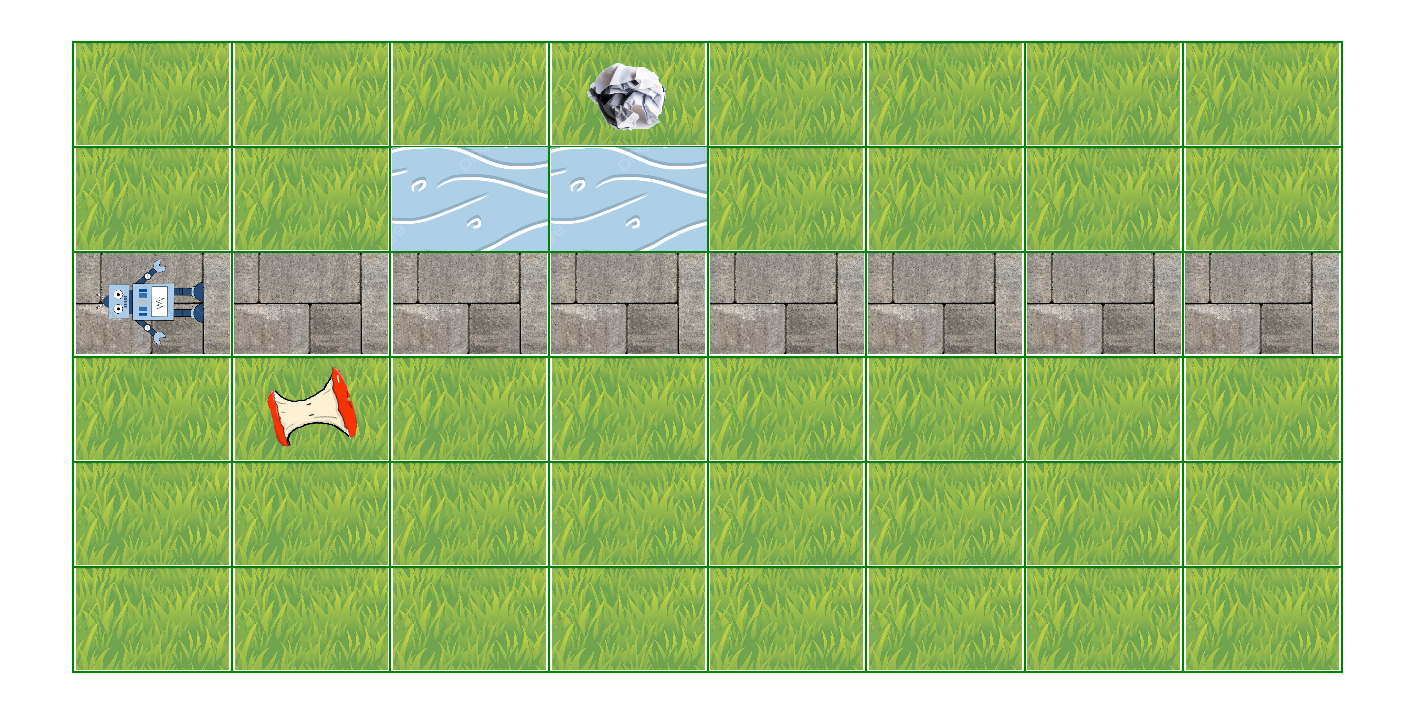

In [5]:
# A graphical representation of the maps can be produced by using the function draw_map()
draw_map(map_example)

To make the problem more accessible, some general simplifications hold for all maps:
 - there will never be litter on the pathway
 - there will never be litter on the first or last column
 - there will never be a river crossing the pathway, i.e., the path will never be blocked.
 - the pathway will always lead through the complete park, i.e., there are no labyrinths or 'dead ends'
 
 
**You should visualize some maps provided with this template using the functions above to get familiar with the problem!**

# 'EcoBot' Mechanics

'EcoBot' moves through the park according to the following iterative procedure:
`'Move on pathway until reachable litter is reached' ⮕ 'Clean litter' ⮕ 'Move on pathway until reachable litter is reached' ⮕ 'Clean litter' ⮕ ... and so on.
`

In the end, 'EcoBot' should have moved through the entire park and cleaned all reachable litter on its way.

The iterative loop as well as the cleaning action are already implemented. In the following, the cleaning action and the movement action are explained in detail. **Your task is only to implement the required logic for the moving action of 'EcoBot'.**

- **Cleaning action (already implemented)**: 'EcoBot' has two lateral grippers that it uses to clean litter. Litter is **reachable** for 'EcoBot', if it is in the same column as 'EcoBot' and if it is not behind a river. The cleaning action will always automatically be performed, if 'EcoBot' stops its movement. **Each tile cleaned by 'EcoBot' will be marked as cleaned 'C' in the knowledge base.**

- **Moving through the park (logic to be implemented by you)**: While moving through the park, 'EcoBot' must always stay on the pathway in order to avoid damage to the grass. 'EcoBot' moves through the park from the left (starting tile) to the right (end tile). The starting tile will already be marked as visited 'V' at the start.
In each iteration, 'EcoBot' must advance on the pathway, until a column with reachable litter is reached. In other words, 'EcoBot' must stop  its movement if and only if a reachable litter is reached. **Each tile visited by 'EcoBot' must be marked as visitied 'V' in the knowledge base. (The current location also counts as visited.)**

To sum up, the movement of 'EcoBot' in each iteration is governed by the following rules: 
 - Always move on the pathway
 - In each iteration, advance on the pathway, until a column with reachable litter is reached
 - In each iteration, mark every visited field as visited 'V' in the knowledge base


To further explain these rules, illustrations are given below.

### Staying on the pathway

<img src="img_notebook/1.png" width="600"/>
<img src="img_notebook/2.png" width="600"/>  

### Stop, if reachable litter is reached

<img src="img_notebook/3.png" width="600"/>

**Iteration 1:** In the picture above 'EcoBot' moves until tile (2,1) and then stops, because there is a reachable litter at tile (3,1). Then, the litter in tile (3,1) will be cleaned within this iteration. The cleaning action is already implemented and will be performed automatically.
 <img src="img_notebook/4.png" width="600"/> 
 
**Iteration 2:** 'EcoBot' continues to move until tile (1,6), where it stops because there is again reachable litter in this column. 

**Note: 'EcoBot' will not stop at tile (4,4), because the litter in that column is not reachable.**

# Knowledge Base generation

## Atomic sentences

Your task is to implement the knowledge base that infers the action for each step. To represent the properties of a field, use one of the five predicates as shown below:

In [6]:
# Formalization of the sentence 'There is a path in field (1,2)':
Path(1, 2)

'P12'

In [7]:
# Formalization of the sentence 'There is litter on Field (3,3)':
Litter(3, 3)

'L33'

In [8]:
# Formalization of the sentence 'There is a river in Field (7,7)':
River(2, 4)

'R24'

In [9]:
# Formalization of the sentence 'EcoBot cleans Field (3,4)':
Clean(3, 4)

'C34'

In [10]:
# Formalization of the sentence 'EcoBot visits Field (5,7)':
Visit(5, 5)

'V55'

## Telling and asking about the knowledge base

With the atomic sentences introduced above, you should construct correct logical sentences that can be used to infer the movement of 'EcoBot' in each iteration. Below you will find an example detailing the notation you can use to construct such sentences, and how to add them to the knowledge base. _**Note:**_ The next logical sentences are **only** meant to illustrate the notation, and **do not** necessarily reflect real scenarios or solutions.


In [11]:
# Notation you can use:
# &     Logical AND
# |     Logical OR
# ~     Negation
# ==>   Implication
# <==   Reverse Implication
# <=>   Equivalence
# (...) Parentheses

# Example of a simple knowledge base construction
# Create an empty knowledge base
kb = KB()

# Formalize the sentences
# 'There is a Path on (2,0)'
# 'Field (2,0) is visited'
# 'There is a Path on (2,1)'
# 'There is no Litter in (0,0)'
sentence1 = Path(2,0)
sentence2 = Visit(2,0)
sentence3 = Path(2,1)
sentence4 = '~'+Litter(0,0)
# Add these sentences to the KB 
kb.tell(expr(sentence1))
kb.tell(expr(sentence2))
kb.tell(expr(sentence3))
kb.tell(expr(sentence4))


# Formalize the sentence
# 'If there is a Path on (2,1) and (2,0) is visited and there is
# no Litter in (0,0), then move to (2,1)'
sentence5 = Path(2,1)+'&'+Visit(2,0)+'&'+'~'+Litter(0,0)+'==>'+Visit(2,1)
# Add this sentence to the KB
kb.tell(expr(sentence5))

# We can now 'ask' the knowledge base whether field (2,1)
# is visited

kb.ask(expr(Visit(2,1)))

True

## Important note
If something is _undefined or contradictory_ in your knowledge base, or if the inference fails, ``kb.ask`` will always return ``False``. Therefore, make sure that you define your knowledge base properly.

The following example shows how an incorrectly defined knowledge base can lead to problems:

In [12]:
# Create a new, empty knowledge base:
kb = KB()

# Add the sentence 'If there is litter in field (0,1), then
# visit the field (1,1)'
sentence = Litter(0,1) + '==>' + Visit(1,1)
kb.tell(expr(sentence))

# If you do not add to the knowledge base the information
# that there is Litter in (0,1), both of the following 
# return False:
print(kb.ask(expr(Visit(1,1))))
print(kb.ask(expr('~'+Visit(1,1))))

# undefined sentences will also always yield false
print(kb.ask(expr('~'+Litter(0,1))))

False
False
False


## Generating your knowledge base

For this exercise, you are required to generate the sentences that govern the moving action of 'EcoBot'. These sentences will then be added to the knowledge base. Here is what this could look like. This is only an example and you need to implement your own knowdlege base later on!

In [13]:
def generate_knowledge_example(parklayout_array):
    map_size = parklayout_array.shape # (6, 8)
    kb = []
    all_tiles = [(x,y) for x in range(map_size[0]) for y in range(map_size[1])]
    
    # Sets every tile to be a path:
    for tile in all_tiles:
        kb.append(Path(tile[0],tile[1]))

    return kb

## Your Task

Implement the function ``generate_knowledge`` in the following code block. This is the only function you need to modify. It should setup the initial knowledge (i.e., where is the pathway, the litter and the rivers, etc) as well as the rules governing the movement of 'EcoBot' as described above.

Feel free to define any helper function you may need, but do not import any additional modules or packages, otherwise your solution will be marked as failed. This exercise is easily solvable without any additional packages.

<div class="alert alert-danger">
    <p>Modify the following codeblock to implement your solution. Please don't edit the other parts of this notebook.</p> 
</div>

In [14]:
### Use this code block to implement your knowledge base
### Feel free to define any helper function you may need
### This is the **only** code block you need to modify
### Please do not change the name and arguments of function "generate_knowledge"
    
def generate_knowledge(parklayout_array):
    """
    Initialize the knowledge base, by adding statements describing
    the initial park layout, as well as the rules determining the
    actions of 'EcoBot'.

    You can use the functions Path(x,y), Litter(x,y), ... to
    produce the statements Pxy, Lxy, ... if x and y are integers.
    
    Input: np.ndarray 2-D array, where each field
            contains either 'P', 'L', 'C', 'R' or 'V'
            
    Output: A list kb of logical sentences that will be added to
             the knowledge base
    """

    # Create empty list kb
    kb = []
    return kb

### 
###
### End of the code block you need to modify

<div class="alert alert-danger">
    <p>End of the codeblock you need to modify.</p> 
</div>

# Running the Algorithm



Your function ``generate_knowledge`` will only be called once at the start, before the main loop. Then, in each iteration of the main loop, the movement action of 'EcoBot' will be inferred using the logical sentences you generated in ``generate_knowledge``. The main loop automatically terminates, if 'EcoBot' does not perform any further actions or if more than 20 actions are required.


**Note: The evaluation runtime of your solution depends heavily on the size of your knowledge base, but it should take no more than one minute for each of your solutions. Otherwise, you can check whether you can remove some of the expressions to speed up the inferring process but still ensure the completeness.**

Feeding the knowledge base with your expressions from generate_knowledge...
Done.


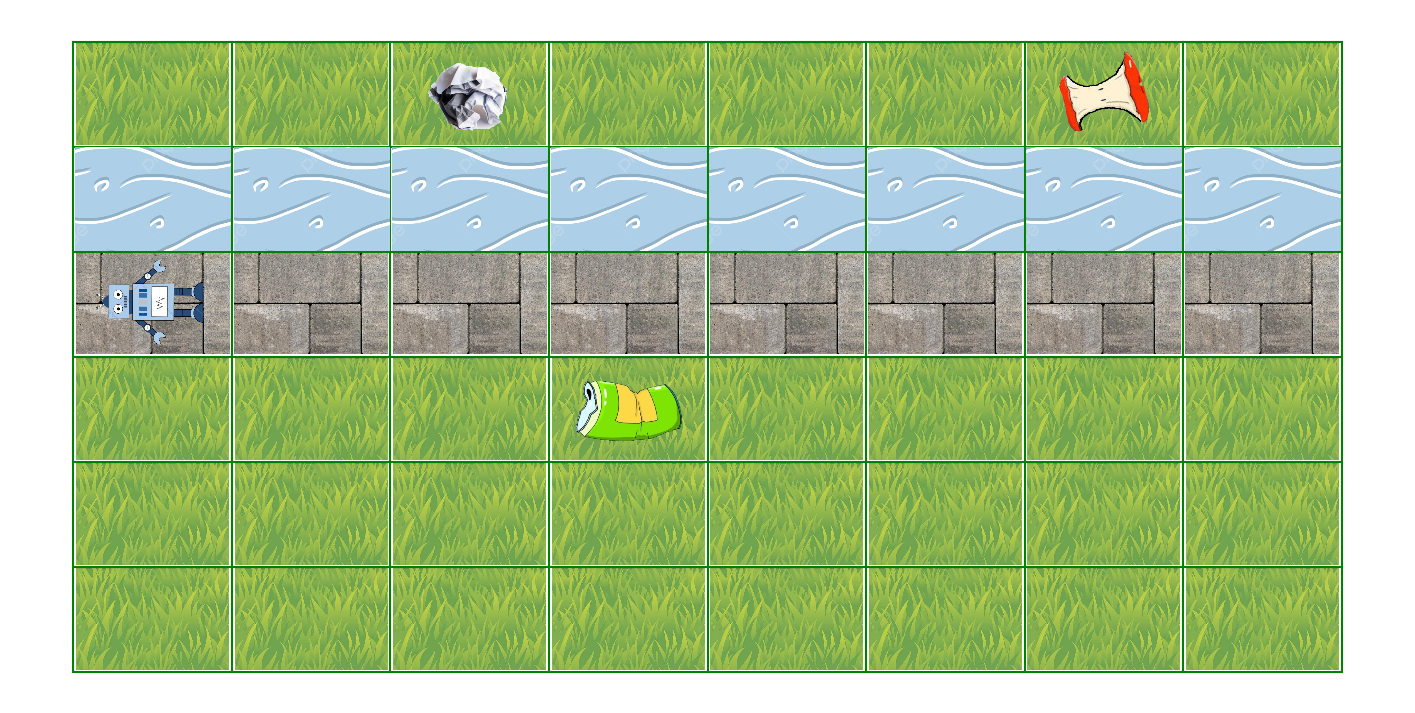

Computing 'EcoBot`s' next action. Please be patient...
Done！
The trajectory of the robot does not change in the next step according to your knowledge base. The iteration has stopped!


In [15]:
# You can run this cell to test your implementation.
# Select the initial map by setting map_index to a value between 1 and 5
map_index = 1
map_selected = np.copy(getattr(maps, "map"+str(map_index)))

# Create an empty knowledge base, and fill it with your knowledge base
kb = KB()
kb_init = generate_knowledge(map_selected)

print('Feeding the knowledge base with your expressions from generate_knowledge...')
for expression in kb_init:
    kb.tell(expr(expression))
print('Done.')

# Set up helper variables
step = 1
old_map = np.copy(map_selected)

draw_map(old_map)


while True:
    # While robot has actions to perform...
    # Get next action of robot
    print("Computing 'EcoBot`s' next action. Please be patient...")
    old_map = np.copy(map_selected)
    
    # infer the movement using your knowledge base
    map_selected = infer_movement(map_selected, kb, n=map_selected.shape)
    
    # perform cleaning action to clean all reachable litter
    map_selected = clean_litter(map_selected, kb, n=map_selected.shape)
    
    if np.array_equal(map_selected, old_map):
        print("Done！")
        print('\033[1;92;107mThe trajectory of the robot does not change in the next step according to your knowledge base. The iteration has stopped!')
        break
    
    print("Done.")
    
    # Display the results
    step = step + 1
    draw_map(np.array(map_selected))
    
    if step > 20:
        # If, in your solution, more than 20 actions are required by the robot, you did a mistake somewhere.
        # In this case, the algorithm abandons, to avoid infinite loops.
        print("Failed to find a solution in finite time.")
        break      
########################################################################################################################

### Sample solution for the Scenario Nr. 3
In order to give you an even better understanding of the problem and show what is expected of you, the correct solution for the scenario nr. 3 provided with this notebook is given. You can find the solution in the pdf file corresponding to this exercise. The solution for this scenario inferred by your knowledge base should look exactly like the solution provided in the pdf file.

In [16]:
# You can check all sentences that you have added to the KB by using the following command:
kb_init

[]